In [1]:
# Import related libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
plt.style.use('ggplot')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
import warnings
warnings.filterwarnings("ignore")

## Data Review

In [2]:
# Import the dataset
df = pd.read_csv('C:/Users/AS/Downloads/data/US_Accidents_June20.csv')

In [3]:
# df.head()

In [4]:
# df.info()

In [5]:
# print('Features: \n', df.columns.tolist())
# print('\nMissing values: \n', df.isnull().values.sum())
# print('\nUnique values: \n', df.nunique())

## Data Visualization

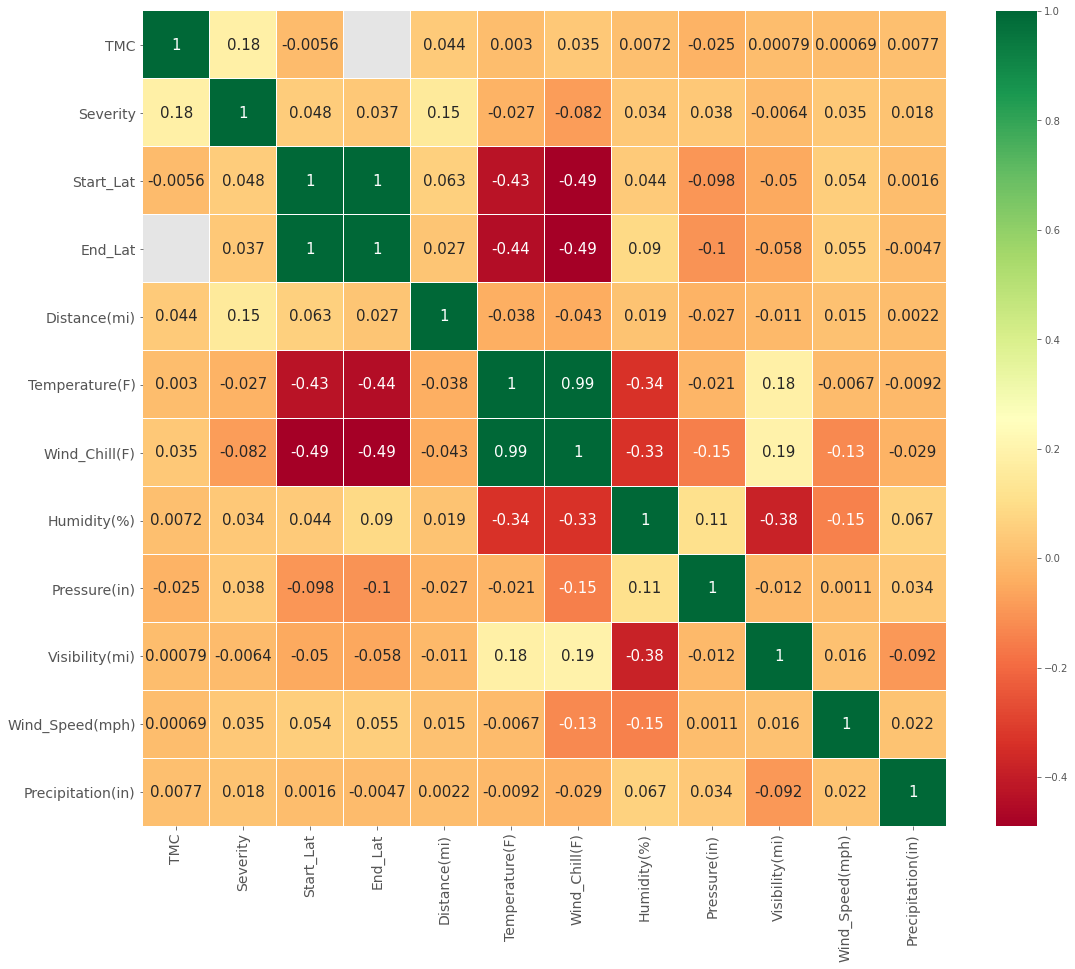

In [6]:
# Correlation
fig = sns.heatmap(
    df[['TMC','Severity','Start_Lat','End_Lat','Distance(mi)','Temperature(F)','Wind_Chill(F)',
        'Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']].corr(),
    annot = True, cmap = 'RdYlGn', linewidths = 0.2, annot_kws = {'size':15})
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

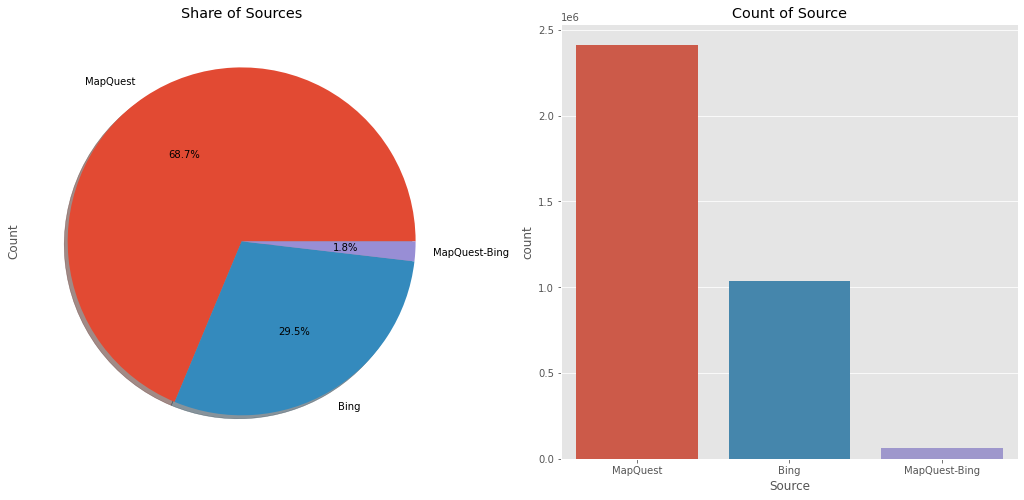

In [7]:
# Source of Data
f, ax = plt.subplots(1, 2, figsize=(18,8))
df['Source'].value_counts().plot.pie(autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Share of Sources')
ax[0].set_ylabel('Count')
sns.countplot('Source', data = df, ax = ax[1], order = df['Source'].value_counts().index)
ax[1].set_title('Count of Source')
plt.show()

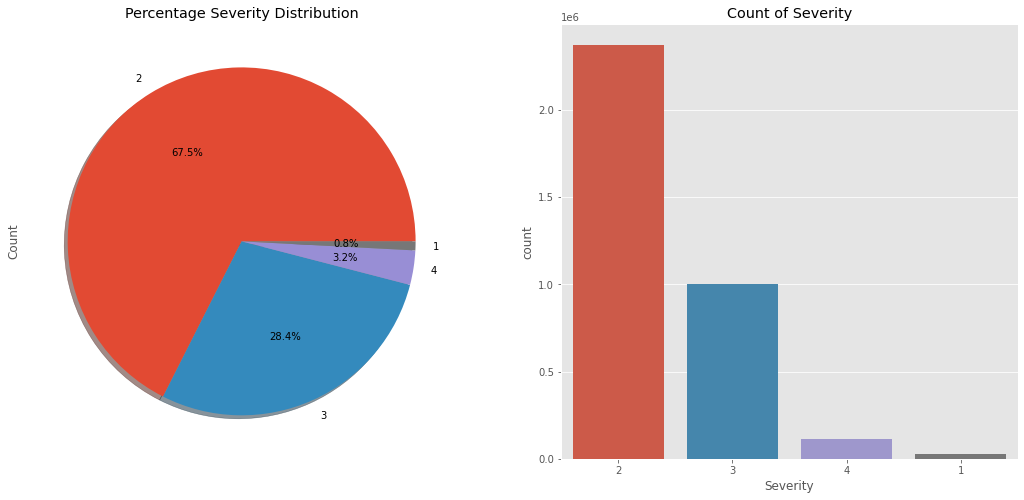

In [8]:
# Severity
f, ax = plt.subplots(1, 2, figsize=(18,8))
df['Severity'].value_counts().plot.pie(autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Percentage Severity Distribution')
ax[0].set_ylabel('Count')
sns.countplot('Severity', data = df, ax = ax[1], order = df['Severity'].value_counts().index)
ax[1].set_title('Count of Severity')
plt.show()

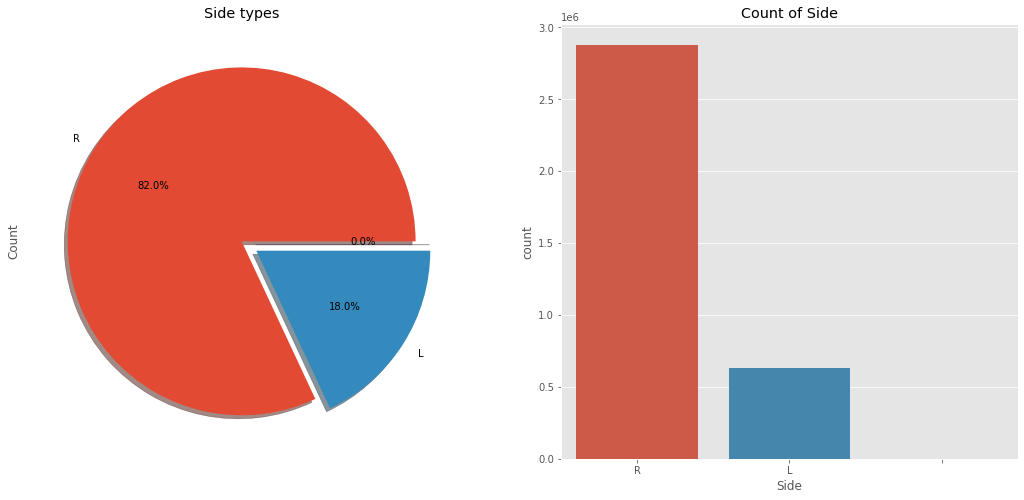

In [9]:
# Side: There are three things mentioned in side (Right Left and third one is a blank space)
f, ax = plt.subplots(1, 2, figsize=(18,8))
df['Side'].value_counts().plot.pie(explode=[0, 0.1, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Side types')
ax[0].set_ylabel('Count')
sns.countplot('Side', data = df, ax = ax[1], order = df['Side'].value_counts().index)
ax[1].set_title('Count of Side')
plt.show()

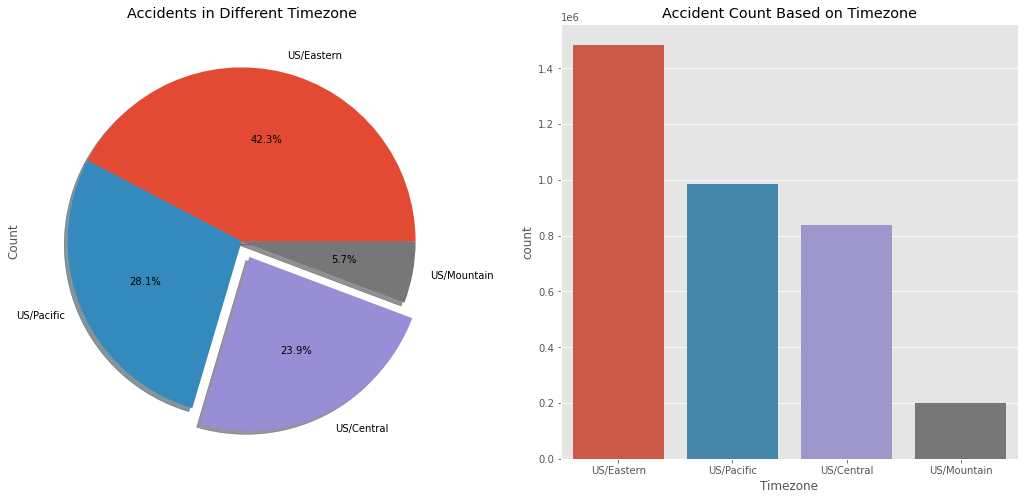

In [10]:
# USA has four time zones Pacific, Mountain, Central and Eastern as we move from West to the east of the country
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Timezone'].value_counts().plot.pie(explode=[0,0,0.1,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Accidents in Different Timezone')
ax[0].set_ylabel('Count')
sns.countplot('Timezone',data=df,ax=ax[1],order=df['Timezone'].value_counts().index)
ax[1].set_title('Accident Count Based on Timezone')
plt.show()

In [11]:
# Time taken to clear the traffice
df['Start_Time'] = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
df['End_Time'] = pd.to_datetime(df.End_Time, format='%Y-%m-%d %H:%M:%S')

top 20 accident durations correspond to 81.8% of the data


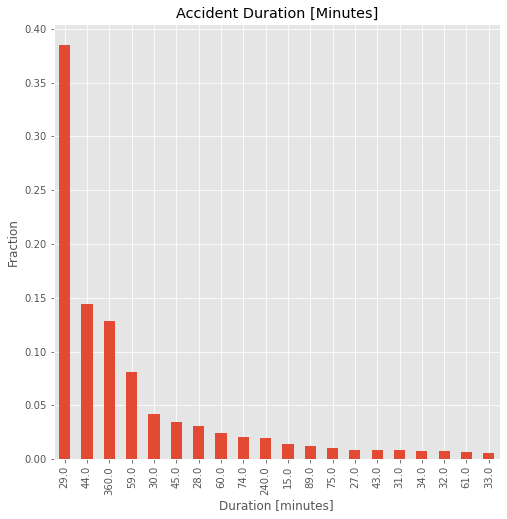

In [12]:
df['diff'] = (df['End_Time']-df['Start_Time'])
top20 = df['diff'].astype('timedelta64[m]').value_counts().nlargest(20)
print('top 20 accident durations correspond to {:.1f}% of the data'.format(top20.sum()*100/len(df['diff'])))
(top20/top20.sum()).plot.bar(figsize=(8,8))
plt.title('Accident Duration [Minutes]')
plt.xlabel('Duration [minutes]')
plt.ylabel('Fraction');

From the above curve we can see that most of the accidents take less than an hours time to get resolved. But more than 15% of the accidents are taking 360 minutes to resolve.

In [13]:
# create df for state accidents
import plotly.graph_objects as go
state_count_acc = pd.value_counts(df['State'])

fig = go.Figure(data = go.Choropleth(
    locations = state_count_acc.index,
    z = state_count_acc.values.astype(float),
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "Count Accidents",
))

fig.update_layout(
    title_text = '2016 - 2020 US Traffic Accident Dataset by State',
    geo_scope='usa',
)
fig.show()

Text(0, 0.5, '')

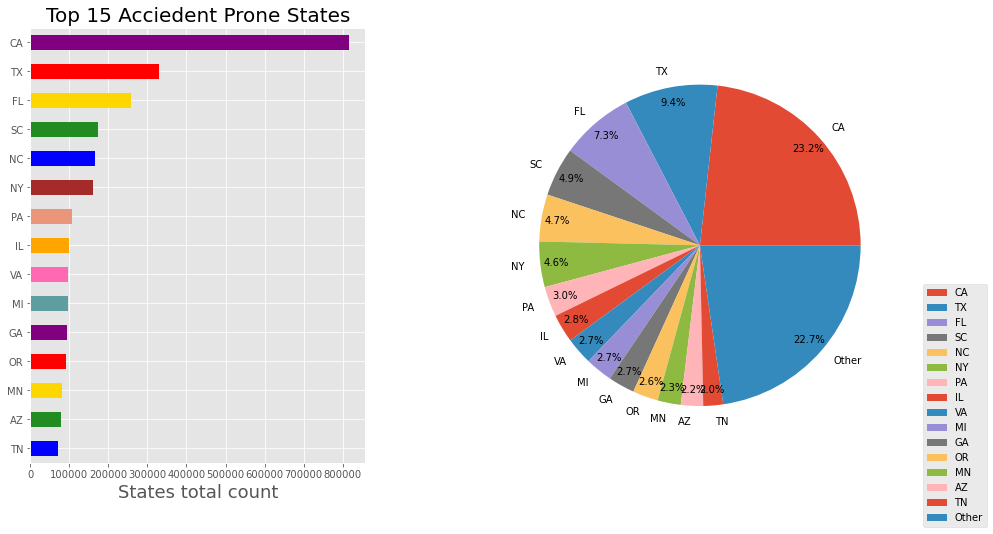

In [14]:
# Acceident in different states
fig,ax = plt.subplots(1, 2, figsize = (15, 8))
clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
df.State.value_counts().sort_values(ascending = False)[:15].sort_values().plot(kind = 'barh', ax = ax[0], color = clr)
ax[0].set_title("Top 15 Acciedent Prone States", size = 20)
ax[0].set_xlabel('States total count', size = 18)

count = df['State'].value_counts()
groups = list(df['State'].value_counts().index)[:15]
counts = list(count[:15])
counts.append(count.agg(sum) - count[:15].agg(sum))
groups.append('Other')
type_dict = pd.DataFrame({"group": groups, "counts": counts})
qx = type_dict.plot(kind = 'pie', y = 'counts', labels = groups, autopct = '%1.1f%%', 
                    pctdistance = 0.9, radius = 1.2, ax = ax[1])
plt.legend(loc = 0, bbox_to_anchor = (1.15, 0.4)) 
plt.subplots_adjust(wspace = 0.5, hspace = 0)
plt.ioff()
plt.ylabel('')

We can see that more accidents are happening in state of California(CA), Texas(TX) and Florida(FL)

In [15]:
# Severity accidents
df_sever = df.sample(n=10000)

fig = go.Figure(
    data = go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sever['Start_Lng'],
        lat = df_sever['Start_Lat'],
        text = df_sever['City'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.5,
            reversescale = False,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width = 1,
                color = 'rgba(102, 102, 102)'),
            colorscale = 'Reds',
            color = df_sever['Severity'],
            colorbar_title = "Severity"
        )
    )
)

fig.update_layout(
        title = 'Severity of accidents',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.7,
            subunitwidth = 0.7
        ),
    )
fig.show()

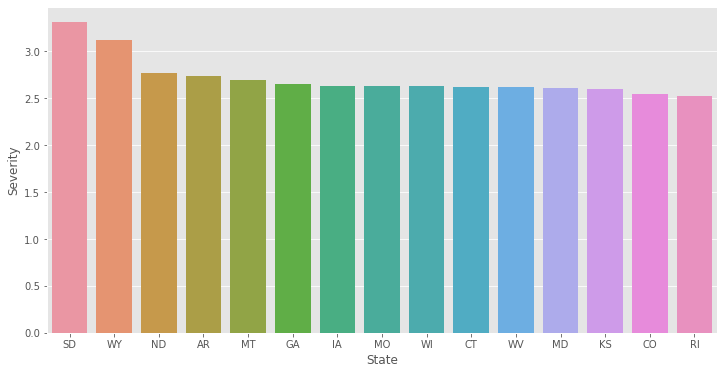

In [16]:
# Severity in different states
df_top_Severity_State = df.groupby('State').agg({'Severity': 'mean'}).sort_values('Severity', ascending = False).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(y = "Severity", x = "State", data = df_top_Severity_State.head(15))
plt.ioff()

In [17]:
# Weather confition for the accidents
fig,ax = plt.subplots(1, 2, figsize = (15, 8))
clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
df.Weather_Condition.value_counts().sort_values(ascending = False)[:10].sort_values().plot(kind = 'barh', ax = ax[0], color = clr)
ax[0].set_title("Top 15 Acciedent Weather Condition", size = 20)
ax[0].set_xlabel('Weather Condition total count', size = 18)

count = df['Weather_Condition'].value_counts()
groups = list(df['Weather_Condition'].value_counts().index)[:10]
counts = list(count[:10])
counts.append(count.agg(sum) - count[:10].agg(sum))
groups.append('Other')
type_dict = pd.DataFrame({"group": groups, "counts": counts})
qx = type_dict.plot(kind = 'pie', y = 'counts', labels = groups, autopct = '%1.1f%%', 
                    pctdistance = 0.9, radius = 1.2, ax = ax[1])
plt.legend(loc = 0, bbox_to_anchor = (1.15, 0.4)) 
plt.subplots_adjust(wspace = 0.5, hspace = 0)
plt.ioff()
plt.ylabel('')

Text(0, 0.5, '')

Most accidents occure when the weather is clear. Maybe people drive faster and inattention when the weather is clear, and more carefully when the weather is bad.

In [18]:
# Where are Accidents occuring
bool_cols = [col for col in df.columns if df[col].dtype == np.dtype('bool')] # find the bool type columns
booldf = df[bool_cols]
more_than_one = booldf[booldf.sum(axis = 1) > 1] # find combination with more than 1 fact
print('There are {} more than one fact metadata rows, which are {:.1f}% of the data'.format(len(more_than_one),100*len(more_than_one)/len(df)))

There are 284711 more than one fact metadata rows, which are 8.1% of the data


In [19]:
bools = booldf.sum(axis = 0)
bools

Amenity             42082
Bump                  606
Crossing           274526
Give_Way             9564
Junction           284449
No_Exit              4384
Railway             31175
Roundabout            184
Station             70321
Stop                51976
Traffic_Calming      1401
Traffic_Signal     623623
Turning_Loop            0
dtype: int64

In [20]:
plt.figure(figsize=(9,8))
plt.style.use('fivethirtyeight')
bools.plot.pie(autopct='%1.1f%%', shadow = True)
plt.ylabel('')
plt.title('Proximity to Traffic Object')

Text(0.5, 1.0, 'Proximity to Traffic Object')

We can see that more accidents are happening near traffic signal,junction, and crossings

In [21]:
# Extract year, month, day, hour and weekday
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.strftime('%a')

<AxesSubplot:xlabel='Year', ylabel='count'>

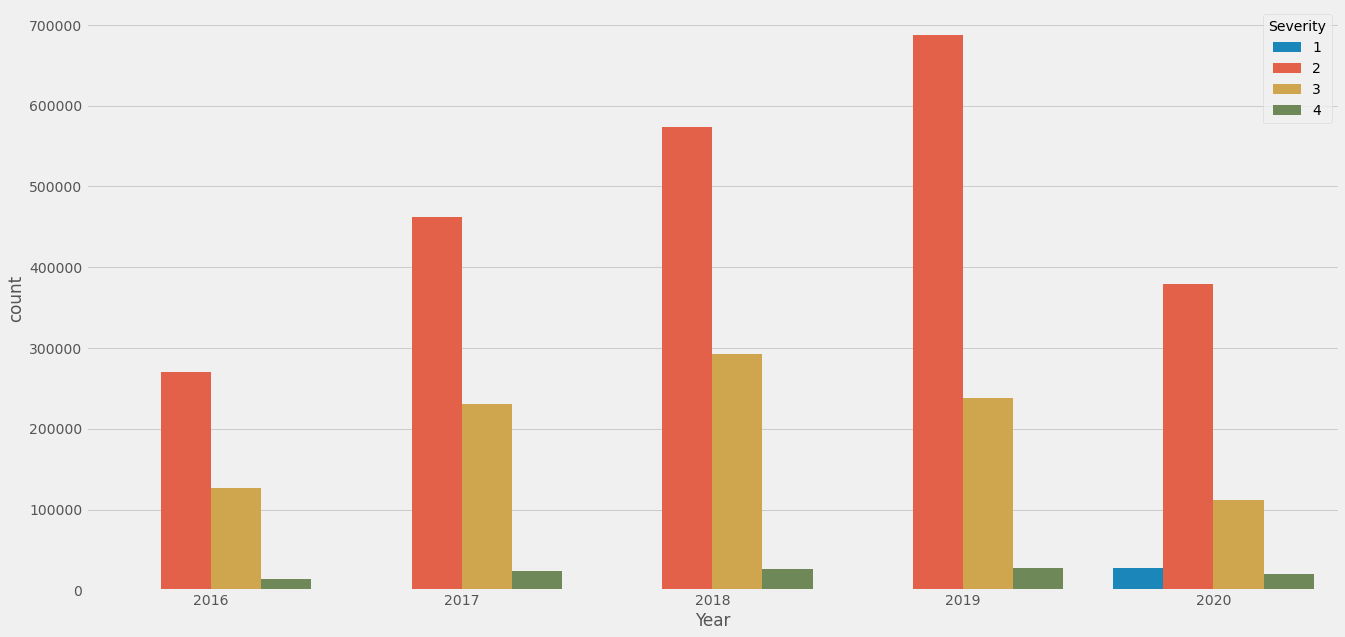

In [22]:
plt.figure(figsize = (20, 10))
sns.countplot(x = "Year", hue = "Severity", data = df)

<AxesSubplot:xlabel='Month', ylabel='count'>

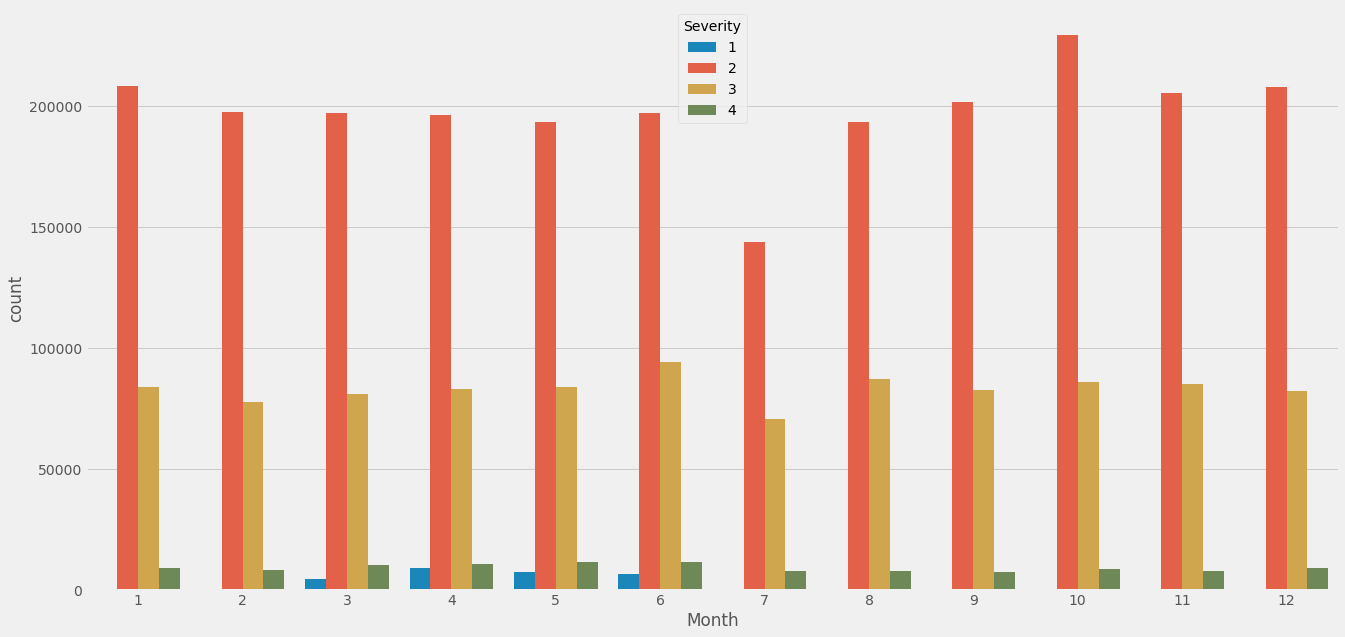

In [23]:
plt.figure(figsize = (20, 10))
sns.countplot(x = "Month", hue = "Severity", data = df)

In [24]:
plt.figure(figsize=(20, 10))
sns.countplot(x = "Day", hue = "Severity", data = df)

<AxesSubplot:xlabel='Day', ylabel='count'>

In [25]:
plt.figure(figsize=(20, 10))
sns.countplot(x = "Weekday", hue = "Severity", data = df)

<AxesSubplot:xlabel='Weekday', ylabel='count'>

<AxesSubplot:xlabel='Hour', ylabel='count'>

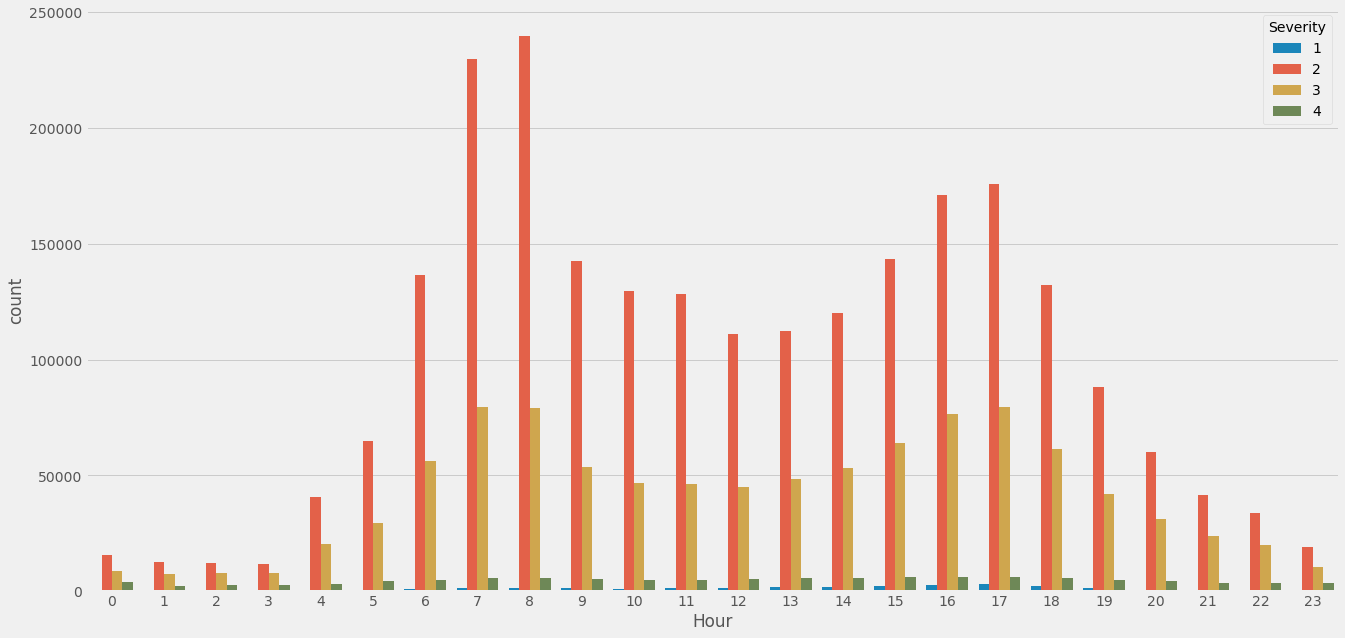

In [26]:
plt.figure(figsize=(20, 10))
sns.countplot(x = "Hour", hue = "Severity", data = df)

In [27]:
# Key Words in Description
from wordcloud import WordCloud
plt.style.use('seaborn')
wrds1 = df["Description"].str.split("(").str[0].value_counts().keys()

wc1 = WordCloud(scale = 5, max_words = 50, colormap = "rainbow", mode = "RGBA", background_color = "white").generate(" ".join(wrds1))
plt.figure(figsize = (20, 15))
plt.imshow(wc1,interpolation = "bilinear")
plt.axis("off")
plt.title("Key Words in Accident Description", color = 'b')
plt.show()

## Data Clearning

In [158]:
# copy the dataframe before start cleaning the data
df_tmp = df.copy()

#### Clean the outliers of the time_duration

In [159]:
# Check if there is any negative time_duration values
df_tmp.loc[df_tmp['diff']/np.timedelta64(1, 'm') <= 0]

ID    Source    TMC  Severity          Start_Time  \
69719      A-69721  MapQuest  201.0         3 2016-11-06 01:38:13   
69720      A-69722  MapQuest  241.0         2 2016-11-06 01:38:45   
69721      A-69723  MapQuest  201.0         3 2016-11-06 01:35:47   
69722      A-69724  MapQuest  201.0         2 2016-11-06 01:32:24   
69723      A-69725  MapQuest  201.0         2 2016-11-06 01:33:05   
309387    A-309390  MapQuest  201.0         2 2016-11-06 01:51:04   
309388    A-309391  MapQuest  201.0         2 2016-11-06 01:51:49   
860988    A-861014  MapQuest  201.0         2 2019-11-03 01:25:16   
861024    A-861050  MapQuest  201.0         2 2019-11-03 01:47:49   
861041    A-861067  MapQuest  201.0         2 2019-11-03 01:34:54   
861475    A-861501  MapQuest  201.0         3 2019-11-03 01:20:44   
861494    A-861520  MapQuest  201.0         3 2019-11-03 01:44:47   
861495    A-861521  MapQuest  201.0         2 2019-11-03 01:43:50   
1497823  A-1497855  MapQuest  201.0         3 2018-11-04 01:30:41   
1497824  A-1497856  MapQuest  201.0         3 2018-11-04 01:40:28   
2234574  A-2234614  MapQuest  201.0         2 2017-11-05 01:56:55   
2234659  A-2234699  MapQuest  241.0         3 2017-11-05 01:32:24   
2234660  A-2234700  MapQuest  201.0         2 2017-11-05 01:55:55   
3104499  A-3104659      Bing    NaN         2 2019-11-03 01:57:00   
3104975  A-3105135      Bing    NaN         2 2019-11-03 01:13:00   
3104978  A-3105138      Bing    NaN         2 2019-11-03 01:22:00   
3232740  A-3232900      Bing    NaN         2 2018-11-04 01:51:53   

                   End_Time  Start_Lat   Start_Lng    End_Lat     End_Lng  \
69719   2016-11-06 01:37:57  34.032963 -118.435738        NaN         NaN   
69720   2016-11-06 01:38:23  34.053040 -118.228264        NaN         NaN   
69721   2016-11-06 01:35:31  33.804443 -118.207527        NaN         NaN   
69722   2016-11-06 01:31:50  34.134960 -117.597748        NaN         NaN   
69723   2016-11-06 01:32:33  34.070320 -117.208679        NaN         NaN   
309387  2016-11-06 01:20:49  47.608002 -122.296280        NaN         NaN   
309388  2016-11-06 01:21:35  47.530354 -122.270004        NaN         NaN   
860988  2019-11-03 01:12:56  42.793083  -78.818367        NaN         NaN   
861024  2019-11-03 01:17:08  43.091412  -75.747284        NaN         NaN   
861041  2019-11-03 01:34:31  41.043110  -73.835861        NaN         NaN   
861475  2019-11-03 01:06:33  45.635433 -122.663467        NaN         NaN   
861494  2019-11-03 01:44:26  37.561687 -122.036362        NaN         NaN   
861495  2019-11-03 01:13:31  37.730671 -121.747063        NaN         NaN   
1497823 2018-11-04 01:00:17  34.172119 -118.467529        NaN         NaN   
1497824 2018-11-04 01:09:39  34.067585 -117.201378        NaN         NaN   
2234574 2017-11-05 01:26:32  47.121880 -122.434883        NaN         NaN   
2234659 2017-11-05 01:02:02  34.045719 -117.310364        NaN         NaN   
2234660 2017-11-05 01:25:05  33.923199 -117.857597        NaN         NaN   
3104499 2019-11-03 01:22:55  43.024010  -71.195290  43.024880  -71.190330   
3104975 2019-11-03 01:05:47  34.041208 -118.064316  34.041208 -118.064316   
3104978 2019-11-03 01:14:47  36.326633 -119.279029  36.326633 -119.279029   
3232740 2018-11-04 01:21:22  40.705504 -111.888270  40.703211 -111.888260   

         Distance(mi)                                        Description  \
69719           0.010   Accident on I-10 Eastbound at Exits 3A 3B I-405.   
69720           0.010  Lane blocked due to accident on US-101 Northbo...   
69721           0.010  Accident on I-710 Northbound at Exits 3A 3B Wi...   
69722           1.230  Hov lane blocked due to accident on CA-210 Eas...   
69723           0.010             Accident on Lugonia Ave at Alabama St.   
309387          0.010  Accident on Martin Luther King Jr Way at Cherr...   
309388          0.010            Accident on Rainier Ave at Elmgrove St.   
860988          6.210  Accident on I-90 Eastboun

In [160]:
# Drop the rows with above
df_tmp['diff'] = df_tmp['diff']/np.timedelta64(1, 'm')
df_tmp = df_tmp[df_tmp['diff'] > 0]

#### Clean the outliers in 'Distance(mi)', 'Temperature(F)', 'Pressure(in)', 'Visibility(mi)', and 'Wind_Speed(mph)'

In [161]:
# check how much outliers these columns has
outlier_list = ['Distance(mi)', 'Temperature(F)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']

# for item in outlier_list:
#     iqr = df_tmp[item].quantile(0.75) - df_tmp[item].quantile(0.25)
#     q_abnormal_L = df_tmp[item] < df_tmp[item].quantile(0.25) - 1.5 * iqr
#     q_abnormal_U = df_tmp[item] > df_tmp[item].quantile(0.75) + 1.5 * iqr
#     print(item + ' has ' + str(q_abnormal_L.sum() + q_abnormal_U.sum()) + ' outliers')

#     df_tmp[item + '_zscore'] = (df_tmp[item] - df_tmp[item].mean())/df_tmp[item].std()
#     z_abnormal = abs(df_tmp[item + '_zscore']) > 3
#     print(item + ' has ' + str(z_abnormal.sum()) + ' outliers')

In [162]:
for item in outlier_list:
    
    iqr = df_tmp[item].quantile(0.75) - df_tmp[item].quantile(0.25)
    lower = df_tmp[item].quantile(0.25) - 1.5 * iqr
    upper = df_tmp[item].quantile(0.75) + 1.5 * iqr     
    df_tmp = df_tmp[df_tmp[item] >= lower]
    df_tmp = df_tmp[df_tmp[item] <= upper]
    
#     median = df_tmp[item].median()
#     std = df_tmp[item].std()
#     df_tmp = df_tmp[(df_tmp[item] - median).abs() <= std * 3]

In [163]:
# df_tmp[outlier_list].info()

#### Deal with missing values


In [164]:
# review the status of missing values for each column
num = df_tmp.isna().sum()
# num

In [165]:
# Set the list of features to include in Machine Learning
feature_lst=['Severity','Start_Lng','Start_Lat','Distance(mi)','Side','City','County','State','Timezone',
             'Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Direction','Wind_Speed(mph)',
             'Weather_Condition','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout',
             'Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset','Hour','Weekday']

In [166]:
# Select the dataset to include only the selected features
df_sel = df_tmp[feature_lst].copy()
# df_sel.info()

In [167]:
# drop the rows with missing values
df_sel.dropna(subset = df_sel.columns[df_sel.isnull().mean()!=0], how = 'any', axis = 0, inplace = True)
# df_sel.shape

In [168]:
# convert all bool columns to int type data (0,1)
df_sel[bool_cols] = df_sel[bool_cols].astype(int)
# df_sel.info()

## Select the sample data for analysing (state of interest, and the City of interest)
Due to the limitation of personal laptop, the whole US dataset is too big to handle

In [169]:
# Select the state of South Carolina, which has the most accident records
df_state = df_sel.loc[df_sel.State == 'CA'].copy()
df_state.drop('State', axis = 1, inplace = True)
# df_state.info()

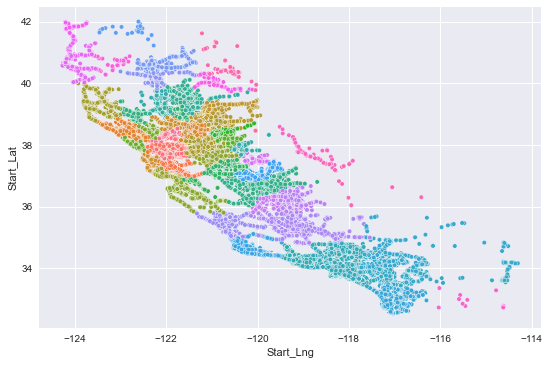

In [170]:
# Map of accidents, color code by county
sns.scatterplot(x = 'Start_Lng', y = 'Start_Lat', data = df_state, hue = 'County', legend = False, s = 20)
plt.show()

In [171]:
# find the city with most accident cases
city = df_state.City.value_counts().sort_values(ascending = False)[:10]
city

Los Angeles      37266
Sacramento       20742
San Diego        14332
San Jose         11897
Oakland           8468
Long Beach        6032
Anaheim           5697
San Francisco     5580
Riverside         4785
Corona            4458
Name: City, dtype: int64

In [172]:
# Select Los Angeies as the target city for modeling
df_city = df_state.loc[df_state.City == 'Los Angeles'].copy()
df_city.drop('City', axis = 1, inplace = True)
# df_city.info()

In [173]:
df_city['Severity'].value_counts(normalize = True) * 100

2    63.975205
3    35.764504
4     0.241507
1     0.018784
Name: Severity, dtype: float64

Which means our prediction accuracy should at least above 64%. Because if a model predicts all the case's Severity to "1", it will get an accuracy at 63.97%

#### Deal with categorical data: pd.get_dummies()

In [174]:
# Generate dummies for categorical data
df_city_dummy = pd.get_dummies(df_city, drop_first = True)
# df_city_dummy.info()

## Predict the accident severity with various supervised machine learning algorithms

#### Import the machine learning libraries

In [175]:
# # Import LogisticRegression
# from sklearn.linear_model import LogisticRegression

# # Import KNeighborsClassifier from sklearn.neighbors
# from sklearn.neighbors import KNeighborsClassifier

# # Import DecisionTreeClassifier from sklearn.tree
# from sklearn.tree import DecisionTreeClassifier

# # Import RandomForestClassifier
# from sklearn.ensemble import RandomForestClassifier

# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV
# from sklearn.feature_selection import SelectFromModel
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import roc_curve, auc

#### Data preparation: train_test_split

In [176]:
# Set the target for the prediction
target='Severity'

# set X and y
y = df_city_dummy[target]
X = df_city_dummy.drop(target, axis = 1)

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21, stratify = y)

In [177]:
# List of classification algorithms
algo_lst = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Trees', 'Random Forest']

# Initialize an empty list for the accuracy for each algorithm
accuracy_lst = []

#### Algorithm A. Logistic regression

In [178]:
# Logistic regression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Get the accuracy score
acc = accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print("[Logistic regression algorithm] accuracy_score: {:.3f}.".format(acc))

[Logistic regression algorithm] accuracy_score: 0.746.


#### Algorithm B. The K-Nearest Neighbors (KNN) algorithm

In [179]:
# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 4)

# Fit the classifier to the data
knn.fit(X_train, y_train)

# Predict the labels for the training data X
y_pred = knn.predict(X_test)

# Get the accuracy score
acc = accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print('[K-Nearest Neighbors (KNN)] knn.score: {:.3f}.'.format(knn.score(X_test, y_test)))
print('[K-Nearest Neighbors (KNN)] accuracy_score: {:.3f}.'.format(acc))

[K-Nearest Neighbors (KNN)] knn.score: 0.672.
[K-Nearest Neighbors (KNN)] accuracy_score: 0.672.


Optmize the number of neighors: plot the accuracy versus number of neighbors

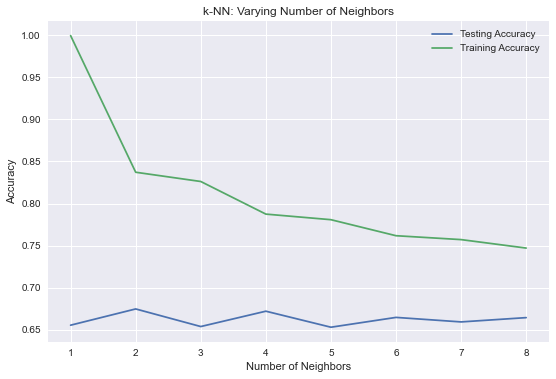

In [180]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, n_neighbor in enumerate(neighbors):
    
    # Setup a k-NN Classifier with n_neighbor
    knn = KNeighborsClassifier(n_neighbors = n_neighbor)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#### Algorithm C. Decision Tree

In [181]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth = 10, criterion = 'entropy', random_state = 1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred = dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

# Print accuracy_entropy
print('[Decision Tree -- entropy] accuracy_score: {:.3f}.'.format(accuracy_entropy))

# Instantiate dt_gini, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth = 10, criterion = 'gini', random_state = 1)

# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_test, y_pred)

# Append to the accuracy list
acc = accuracy_gini
accuracy_lst.append(acc)

# Print accuracy_gini
print('[Decision Tree -- gini] accuracy_score: {:.3f}.'.format(accuracy_gini))

[Decision Tree -- entropy] accuracy_score: 0.828.
[Decision Tree -- gini] accuracy_score: 0.831.


#### Algorithm D. Random Forest

In [182]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators = 500)

#Train the model
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("[Randon forest algorithm] accuracy_score: {:.3f}.".format(acc))

[Randon forest algorithm] accuracy_score: 0.831.


Find the most important features

No handles with labels found to put in legend.


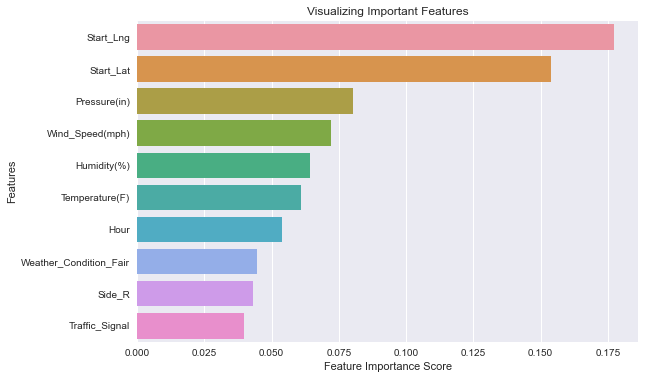

In [183]:
feature_imp = pd.Series(clf.feature_importances_, index = X.columns).sort_values(ascending = False)

# Creating a bar plot, displaying only the top k features
k = 10
sns.barplot(x = feature_imp[:10], y = feature_imp.index[:k])

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [184]:
# List top k important features
k = 20
feature_imp.sort_values(ascending = False)[:k]

Start_Lng                          0.177459
Start_Lat                          0.153679
Pressure(in)                       0.080270
Wind_Speed(mph)                    0.072221
Humidity(%)                        0.064079
Temperature(F)                     0.061090
Hour                               0.053806
Weather_Condition_Fair             0.044552
Side_R                             0.043219
Traffic_Signal                     0.039861
Distance(mi)                       0.019465
Junction                           0.012448
Weather_Condition_Cloudy           0.008707
Sunrise_Sunset_Night               0.008554
Weekday_Tue                        0.008476
Weekday_Mon                        0.008101
Weekday_Sat                        0.008043
Weekday_Wed                        0.007953
Weather_Condition_Partly Cloudy    0.007933
Wind_Direction_SW                  0.007810
dtype: float64

In [185]:
# Create a selector object that will use the random forest classifier to identify features which importance > 0.04
sfm = SelectFromModel(clf, threshold = 0.04)

# Train the selector
sfm.fit(X_train, y_train)

feat_labels = X.columns

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices = True):
    print(feat_labels[feature_list_index])

Start_Lng
Start_Lat
Temperature(F)
Humidity(%)
Pressure(in)
Wind_Speed(mph)
Traffic_Signal
Hour
Side_R
Weather_Condition_Fair


In [186]:
# Transform the data to create a new dataset containing only the most important features
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators = 500, random_state = 0, n_jobs = -1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [187]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature Model
print('[Randon forest algorithm -- Full feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_pred)))

# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature Model
print('[Randon forest algorithm -- Limited feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_important_pred)))

# Get the accuracy score
acc = accuracy_score(y_test, y_important_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

[Randon forest algorithm -- Full feature] accuracy_score: 0.841.
[Randon forest algorithm -- Limited feature] accuracy_score: 0.861.


#### Accuracy Score VS. Algorithm

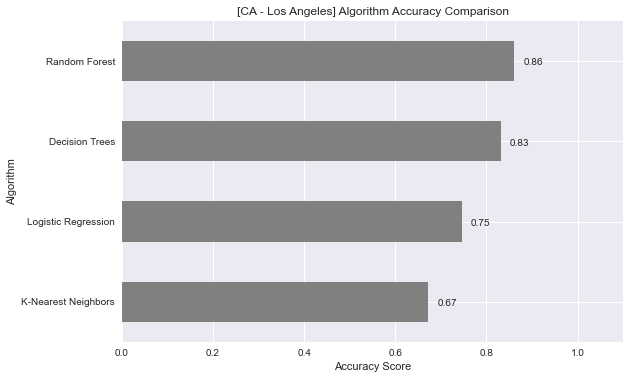

In [188]:
# Generate a list of ticks for y-axis
y_ticks = np.arange(len(algo_lst))

# Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
df_acc = pd.DataFrame(list(zip(algo_lst, accuracy_lst)), columns = ['Algorithm', 'Accuracy_Score']).sort_values(by = ['Accuracy_Score'], ascending = True)

# Make a plot
ax = df_acc.plot.barh('Algorithm', 'Accuracy_Score', align = 'center', legend = False, color = '0.5')

# Add the data label on to the plot
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width() + 0.02, i.get_y() + 0.2, str(round(i.get_width(), 2)), fontsize = 10)

# Set the limit, lables, ticks and title
plt.xlim(0, 1.1)
plt.xlabel('Accuracy Score')
plt.yticks(y_ticks, df_acc['Algorithm'], rotation = 0)
plt.title('[CA - Los Angeles] Algorithm Accuracy Comparison')
plt.show()